# Data Preprocessing


## Library Imports

In [19]:
# For Google colab
# from google.colab import drive
# drive.mount("Mydrive")

# General libraries
import datetime

# Data Manipulation libraries
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Process libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.regularizers import l2
from keras.callbacks import EarlyStopping



## Data Imports


In [3]:
# For Google colab
# df=pd.read_csv("/content/Mydrive/MyDrive/Train_data.csv")

# For Local system
df=pd.read_csv("./Train_data.csv")

## Exploratory Data Analysis


In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Missing Value Detection 


In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Data Visualization



<Axes: xlabel='class', ylabel='count'>

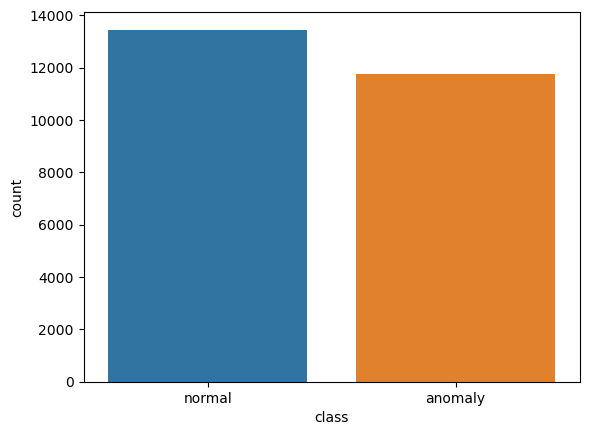

In [9]:
sns.countplot(x=df["class"])

## Feature Engineering


### One-Hot Encoding


In [10]:
dummy_variables=pd.get_dummies(data = df["protocol_type"], prefix="protocol", prefix_sep= '-', drop_first=True)
dummy_variables=dummy_variables.astype(np.uint)
dummy_variables=dummy_variables.astype('category')
dummy_variables.head()

,protocol-tcp,protocol-udp
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


### Data Manupulation


In [11]:
df=pd.concat([df,dummy_variables],axis=1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol-tcp,protocol-udp
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     25192 non-null  int64   
 1   protocol_type                25192 non-null  object  
 2   service                      25192 non-null  object  
 3   flag                         25192 non-null  object  
 4   src_bytes                    25192 non-null  int64   
 5   dst_bytes                    25192 non-null  int64   
 6   land                         25192 non-null  int64   
 7   wrong_fragment               25192 non-null  int64   
 8   urgent                       25192 non-null  int64   
 9   hot                          25192 non-null  int64   
 10  num_failed_logins            25192 non-null  int64   
 11  logged_in                    25192 non-null  int64   
 12  num_compromised              25192 non-null  int64   
 13  r

### Label Encoding


In [13]:
label=LabelEncoder()
df["protocol_type"]=label.fit_transform(df["protocol_type"])
df["service"]=label.fit_transform(df["service"])
df["flag"]=label.fit_transform(df["flag"])
df["class"]=label.fit_transform(df["class"])

# Model Building


## TrainTest Split


In [14]:
X=df.drop(columns=["protocol_type", "class"])
X.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol-tcp,protocol-udp
0,0,19,9,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,0
1,0,41,9,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,1
2,0,46,5,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,0
3,0,22,9,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,0
4,0,22,9,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0


In [15]:
y=df["class"]
y.head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int32

In [16]:
# from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [17]:
X_train.shape

(20153, 42)

## Model Initialization


In [20]:
#neutral network
start = datetime.datetime.now()
model=tf.keras.models.Sequential([tf.keras.layers.Dense(units=128,activation="relu"),
                                  tf.keras.layers.Dense(units=64,activation="relu", kernel_regularizer=l2(0.01)),
                                  tf.keras.layers.Dense(units=64,activation="relu",kernel_regularizer=l2(0.01)),
                                  tf.keras.layers.Dense(units=64,activation="relu",kernel_regularizer=l2(0.01)),
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Dense(1,activation="sigmoid")])
time_taken_cnn = datetime.datetime.now() - start
print(f"Time taken for CNN model definition {time_taken_cnn.total_seconds()} ms")

Time taken for CNN model definition 0.247953 ms


In [21]:
start = datetime.datetime.now()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
time_taken_cnn = datetime.datetime.now() - start
print(f"Time taken for CNN model compilation {time_taken_cnn.total_seconds()} ms")

Time taken for CNN model compilation 0.061073 ms


## Model Training


In [22]:
start = datetime.datetime.now()
history=model.fit(X_train,y_train,batch_size=32,validation_data=(X_test,y_test),epochs=30,callbacks=[EarlyStopping(patience=3)])
time_taken_cnn = datetime.datetime.now() - start
print(f"Time taken for CNN model training {time_taken_cnn.total_seconds()} ms")

Epoch 1/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8624 - loss: 187.5265 - val_accuracy: 0.8430 - val_loss: 39.8644
Epoch 2/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9024 - loss: 91.7198 - val_accuracy: 0.9333 - val_loss: 45.0232
Epoch 3/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9090 - loss: 263.1684 - val_accuracy: 0.9424 - val_loss: 29.8584
Epoch 4/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9143 - loss: 93.5880 - val_accuracy: 0.9627 - val_loss: 61.5682
Epoch 5/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9112 - loss: 115.8835 - val_accuracy: 0.9692 - val_loss: 5.7210
Epoch 6/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9522 - loss: 64.8807 - val_accuracy: 0.9639 - val_loss: 4.3073
Epoch 7/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9541 - loss: 10.8457 - val_accuracy: 0.9665 - val_loss: 5.8463
Epoch 8/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9542 - loss: 16.0562 - v

# Model Evaluation and Result


## Models Performance



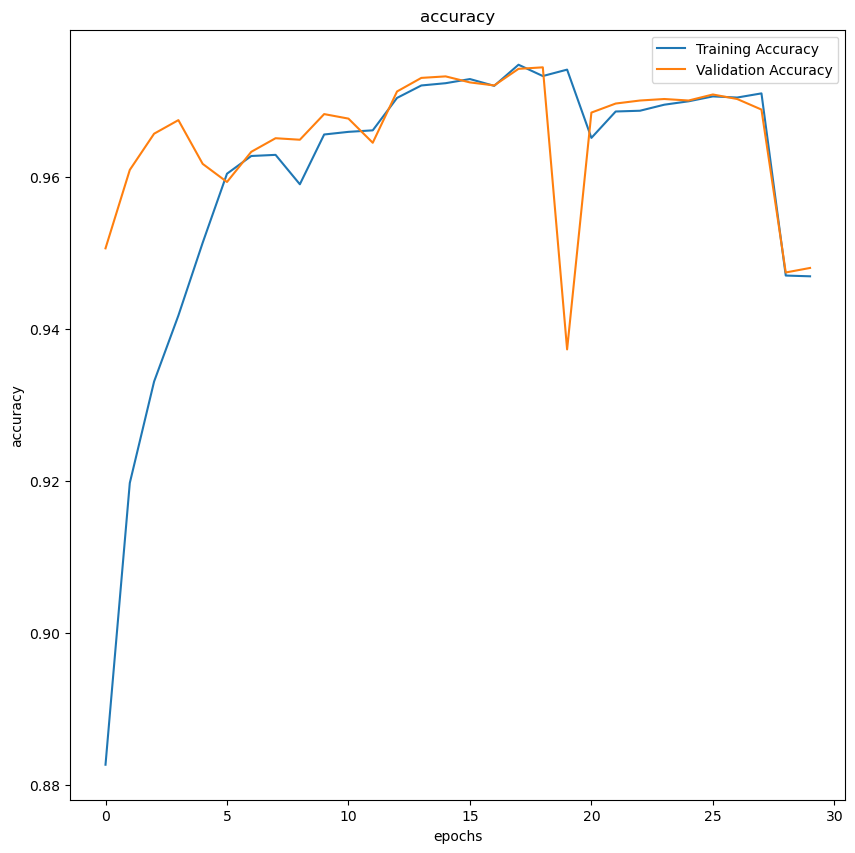

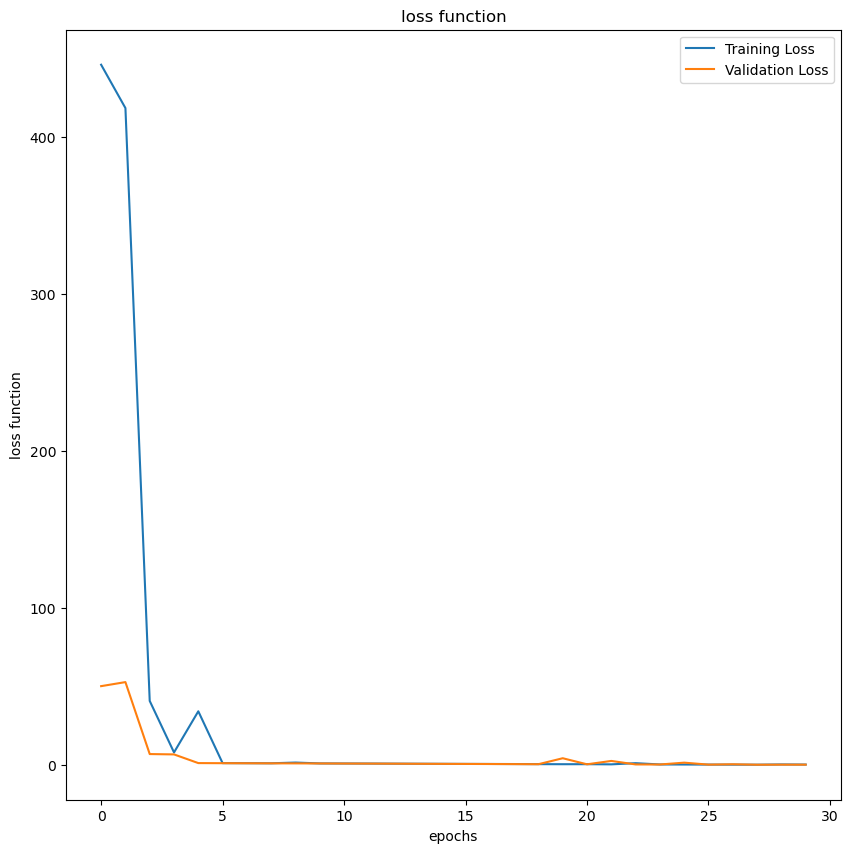

In [18]:
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]

train_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

plt.figure(figsize=(10,10))
plt.plot(train_accuracy, label= "Training Accuracy")
plt.plot(val_accuracy, label= "Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.plot(train_loss, label= "Training Loss")
plt.plot(val_loss, label= "Validation Loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("loss function")
plt.show()


## Models Evaluation


In [21]:
X_test.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol-tcp,protocol-udp
15378,1,51,9,1517,332,0,0,0,0,0,...,0.62,0.12,0.03,0.02,0.0,0.01,0.0,0.0,1,0
48,0,19,9,334,0,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.0,0.00,0.0,0.0,1,0
6910,0,22,9,314,810,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1,0
7849,0,8,2,0,0,0,0,0,0,0,...,0.05,0.08,0.00,0.00,0.0,0.00,1.0,1.0,1,0
19598,0,46,5,0,0,0,0,0,0,0,...,0.08,0.08,0.00,0.00,1.0,1.00,0.0,0.0,1,0


In [19]:
X_test.iloc[1, :].head()

duration       0.0
service       19.0
flag           9.0
src_bytes    334.0
dst_bytes      0.0
Name: 48, dtype: float64

In [22]:
y_test.iloc[1]

0

In [23]:
model.predict(X_test)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[8.1322253e-01],
       [8.1322253e-01],
       [1.0000000e+00],
       ...,
       [9.9999857e-01],
       [9.8544723e-01],
       [1.0104588e-08]], dtype=float32)

In [24]:
X_test.iloc[1]

duration                         0.00
service                         19.00
flag                             9.00
src_bytes                      334.00
dst_bytes                        0.00
land                             0.00
wrong_fragment                   0.00
urgent                           0.00
hot                              0.00
num_failed_logins                0.00
logged_in                        1.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_file_creations               0.00
num_shells                       0.00
num_access_files                 0.00
num_outbound_cmds                0.00
is_host_login                    0.00
is_guest_login                   0.00
count                            2.00
srv_count                        2.00
serror_rate                      0.00
srv_serror_rate                  0.00
rerror_rate                      0.00
srv_rerror_r

In [25]:
X_test.iloc[1]

duration                         0.00
service                         19.00
flag                             9.00
src_bytes                      334.00
dst_bytes                        0.00
land                             0.00
wrong_fragment                   0.00
urgent                           0.00
hot                              0.00
num_failed_logins                0.00
logged_in                        1.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_file_creations               0.00
num_shells                       0.00
num_access_files                 0.00
num_outbound_cmds                0.00
is_host_login                    0.00
is_guest_login                   0.00
count                            2.00
srv_count                        2.00
serror_rate                      0.00
srv_serror_rate                  0.00
rerror_rate                      0.00
srv_rerror_r

In [26]:
# If checking for a single test case, please use reshape function from numpy to convert the data into the right format and shape

model.predict(np.reshape(X_test.iloc[1], (1,-1)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.8132225]], dtype=float32)